**Top 500 criptomonedas**

A continuación realizamos un top 500 de criptomonedas utilizando la API proporcionada por CoinMarketCap. El top 500 está evaluado en base a la capitalización de mercado de cada criptomoneda.

In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
from google.colab import drive
import sklearn as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import requests
!pip install google-api-python-client
from googleapiclient.discovery import build
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
api_key = '71f1e468-c082-434d-8889-101e33fd8f06'

In [ ]:
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key
}


In [ ]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'


In [ ]:
params = {
  'start': '1',
  'limit': '500',
  'convert': 'USD'
}


In [ ]:
response = requests.get(url, headers=headers, params=params)


In [ ]:
data = json.loads(response.text)


In [ ]:
crypto_list = []
for crypto in data['data']:
    name = crypto['name']
    symbol = crypto['symbol']
    price = crypto['quote']['USD']['price']
    circulating_supply = crypto['circulating_supply']
    max_supply = crypto['max_supply']
    self_reported_circulating_supply = crypto['self_reported_circulating_supply']
    crypto_list.append([name, symbol, price,circulating_supply,max_supply,self_reported_circulating_supply])

df = pd.DataFrame(crypto_list, columns=['Name', 'Symbol', 'Price', 'circulating_supply','max_supply','self_reported_circulating_supply'])


**Datos del dataframe**

"Name": Nombre de la criptomoneda.

"Symbol": Las siglas que representan la criptomoneda.

"Price": Su precio al momento de tomar los datos.

"Circulating_supply": Suministro en circulación, la cantidad de activos en circulación.

"Max_supply": Cantidad máxima de suministro, la cantidad máxima del activo que puede estar en circulación. En caso de que esté representado como "NaN" significa que no tiene un suministro máximo.

"Self_reported_circulating_supply": Suministro en circulación declarado por la institución que regula el activo. En caso de que esté representado como "NaN" significa que no está controlado por ninguna institución o no fue declarada la cantidad.

In [ ]:
df

,Name,Symbol,Price,circulating_supply,max_supply,self_reported_circulating_supply
0,Bitcoin,BTC,24228.197822,1.931685e+07,2.100000e+07,NaN
1,Ethereum,ETH,1671.995984,1.223739e+08,NaN,NaN
2,Tether,USDT,1.003711,7.289955e+10,NaN,NaN
3,BNB,BNB,307.785476,1.578924e+08,NaN,NaN
4,USD Coin,USDC,0.998170,3.950979e+10,NaN,NaN
...,...,...,...,...,...,...
495,MonaCoin,MONA,0.500099,6.572967e+07,1.051200e+08,NaN
496,Gas,GAS,3.242074,1.012838e+07,1.000000e+08,5.908334e+07
497,Komodo,KMD,0.241175,1.359539e+08,2.000000e+08,NaN
498,AhaToken,AHT,0.009233,3.550362e+09,1.050000e+10,2.996628e+09


**Data histórica de Bitcoin**

Utlizamos la API proporcionada por CryptoCompare para hacer un dataframe que contenga data histórica de Bitcoin, desde 2017 hasta 2023.

In [ ]:
import requests
import pandas as pd

api_key = "e9e611db5483f01736b5c5a1690c4b341bb73365bc97be2d3e16cec32d87530a"

url = "https://min-api.cryptocompare.com/data/v2/histoday"

params = {
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000, 
    "api_key": api_key
}

response = requests.get(url, params=params)

data = response.json()["Data"]["Data"]

df1 = pd.DataFrame(data, columns=["time", "open", "high", "low", "close", "volume"])

df1["time"] = pd.to_datetime(df1["time"], unit="s")
df1.set_index("time", inplace=True)

print(df1.head())

               open     high      low    close  volume
time                                                  
2017-09-21  3882.16  3912.79  3576.54  3617.27     NaN
2017-09-22  3617.27  3753.51  3505.81  3600.83     NaN
2017-09-23  3600.83  3813.39  3563.18  3788.02     NaN
2017-09-24  3788.02  3790.89  3633.88  3667.52     NaN
2017-09-25  3667.52  3971.50  3665.67  3932.83     NaN


**Datos del datframe**

"time": fecha a la que corresponde los datos.

"Open": Precio de apertura.

"High": Precio máximo al que llegó el activo en ese día.

"Low": Precio mínimo al que llegó el activo en ese día.

"Close": Preció en el que cerró el activo ese día.

"Volume": Cantidad negociada del activo en ese caso.

In [ ]:
df1

,open,high,low,close,volume
time,,,,,
2017-09-21,3882.16,3912.79,3576.54,3617.27,NaN
2017-09-22,3617.27,3753.51,3505.81,3600.83,NaN
2017-09-23,3600.83,3813.39,3563.18,3788.02,NaN
2017-09-24,3788.02,3790.89,3633.88,3667.52,NaN
2017-09-25,3667.52,3971.50,3665.67,3932.83,NaN
...,...,...,...,...,...
2023-03-10,20369.38,20370.96,19597.37,20207.71,NaN
2023-03-11,20207.71,20847.54,19898.92,20610.50,NaN
2023-03-12,20610.50,22215.00,20448.60,22180.75,NaN


**Tipos de cambio de un registro histórico de monedas de los intervalos de tiempo(hrs,min,sec).**

El tipo de cambio se define como (VWAP-24H) las últimas 24 horas (ventana móvil en el tiempo).

Los tipos de cambio se generan a partir de conjuntos de datos de cotizaciones, transacciones y metadatos.

Se extrae una una lista completa de los tipos de cambio históricos de cualquier activos, agrupados en períodos de tiempo.


Conexion a la api:

https://www.coinapi.io/
https://docs.coinapi.io/market-data/rest-api/exchange-rates

Se obtiene el tipo de cambio entre un par de activos solicitados.
Tenemos una BD de 3965 registros

In [ ]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC?invert=false'

payload = {}
headers= {'X-CoinAPI-Key' : '11FFD66F-7A70-4195-B61B-400822103829'}

response = requests.request("GET", url, headers=headers, data = payload)


json_data_exchange = json.loads(response.text.encode('utf8'))

In [ ]:
print(json_data_exchange)

**Variable de la Data de Tipos de Cambio**

**time** Tiempo en ISO 8601 de los datos de mercado utilizados para calcular los tipos de cambio.

**asset_id_base**	Identificador del activo base de tipo de cambio solicitado.

**asset_id_quote**	Identificador del activo de cotización de tipo de cambio solicitado.

**rate**	Tipo de cambio entre activos.

{
    "time": "2017-08-09T14:31:18.3150000Z",
     "asset_id_base": "BTC",
     "asset_id_quote": "USD",
    "rate": 3260.3514321215056208129867667
}

**Guardando el json data en un dataframe**

In [ ]:
dfexchange = pd.DataFrame(json_data_exchange)
dfexchange.to_csv('bitcoinexchange-data.csv', index=False)

In [ ]:
print(dfexchange.sample)

<bound method NDFrame.sample of      asset_id_base                                              rates
0              BTC  {'time': '2023-03-13T23:14:01.0000000Z', 'asse...
1              BTC  {'time': '2023-03-13T23:14:01.0000000Z', 'asse...
2              BTC  {'time': '2023-03-13T23:14:01.0000000Z', 'asse...
3              BTC  {'time': '2023-03-13T23:14:01.0000000Z', 'asse...
4              BTC  {'time': '2023-03-13T23:14:01.0000000Z', 'asse...
...            ...                                                ...
4086           BTC  {'time': '2023-03-12T23:44:29.0000000Z', 'asse...
4087           BTC  {'time': '2023-03-12T23:42:10.0000000Z', 'asse...
4088           BTC  {'time': '2023-03-12T23:32:09.0000000Z', 'asse...
4089           BTC  {'time': '2023-03-12T23:28:20.0000000Z', 'asse...
4090           BTC  {'time': '2023-03-12T23:21:39.0000000Z', 'asse...

[4091 rows x 2 columns]>


**Conclusion**

Podemos utilizar este dataframe para hacer trading con los datos proporcionados tales como, la cotización, transacciones y metadata.

En el siguiente analisis vamos a explorar diferentes datos extraidos de Coinmarketcap.com

La API de CoinMarketCap proporciona una gran cantidad de datos relacionados con criptomonedas. Algunos ejemplos de datos que puedes extraer de la misma página son:

1-Una lista de las 100 criptomonedas con mayor capitalización de mercado

2-La variación porcentual del precio de una criptomoneda en las últimas 24 horas

3-El volumen de operaciones de una criptomoneda en las últimas 24 horas

4-La capitalización de mercado de una criptomoneda

5-La lista de las criptomonedas más populares en el momento

In [ ]:
url_base = 'https://pro-api.coinmarketcap.com/v1/'

1-Una lista de las 100 criptomonedas con mayor capitalización de mercado
La capitalización de mercado de una criptomoneda es el valor total de la criptomoneda en el mercado. Se calcula multiplicando el precio actual de la criptomoneda por la cantidad total de monedas en circulación. Por lo tanto, la lista de las 100 criptomonedas con mayor capitalización de mercado mostrará las 100 criptomonedas que tienen el mayor valor en el mercado en un momento determinado.

In [ ]:
headers = {'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'}
params = {'start': '1', 'limit': '100', 'convert': 'USD'}

response = requests.get(url_base + 'cryptocurrency/listings/latest',
                        headers=headers,
                        params=params)

print(response.text)

import json

data = json.loads(response.text)

{"status":{"timestamp":"2023-03-14T01:22:49.991Z","error_code":0,"error_message":null,"elapsed":16,"credit_count":1,"notice":null,"total_count":9079},"data":[{"id":1,"name":"Bitcoin","symbol":"BTC","slug":"bitcoin","num_market_pairs":10090,"date_added":"2013-04-28T00:00:00.000Z","tags":["mineable","pow","sha-256","store-of-value","state-channel","coinbase-ventures-portfolio","three-arrows-capital-portfolio","polychain-capital-portfolio","binance-labs-portfolio","blockchain-capital-portfolio","boostvc-portfolio","cms-holdings-portfolio","dcg-portfolio","dragonfly-capital-portfolio","electric-capital-portfolio","fabric-ventures-portfolio","framework-ventures-portfolio","galaxy-digital-portfolio","huobi-capital-portfolio","alameda-research-portfolio","a16z-portfolio","1confirmation-portfolio","winklevoss-capital-portfolio","usv-portfolio","placeholder-ventures-portfolio","pantera-capital-portfolio","multicoin-capital-portfolio","paradigm-portfolio","btc-ecosystem"],"max_supply":21000000,"

In [ ]:
# Seleccionar los datos de interés
datos = data['data']
monedas = []
for moneda in datos:
    monedas.append({
        'Nombre': moneda['name'],
        'Símbolo': moneda['symbol'],
        'Precio USD': moneda['quote']['USD']['price'],
        'Capitalización de mercado': moneda['quote']['USD']['market_cap'],
        'Volumen 24h': moneda['quote']['USD']['volume_24h']
    })

# Almacenar los datos en un DataFrame
df = pd.DataFrame(monedas)
print(df)

                   Nombre Símbolo    Precio USD  Capitalización de mercado  \
0                 Bitcoin     BTC  24283.590950               4.690825e+11   
1                Ethereum     ETH   1674.708103               2.049405e+11   
2                  Tether    USDT      1.004082               7.319710e+10   
3                     BNB     BNB    307.701114               4.858367e+10   
4                USD Coin    USDC      0.999043               3.947197e+10   
..                    ...     ...           ...                        ...   
95            ssv.network     SSV     39.745661               3.974566e+08   
96          BinaryX (old)     BNX     81.936221               3.972225e+08   
97                   dYdX    DYDX      2.388907               3.732814e+08   
98            EthereumPoW    ETHW      3.427727               3.695741e+08   
99  Basic Attention Token     BAT      0.238573               3.578505e+08   

     Volumen 24h  
0   4.736731e+10  
1   1.483856e+10  
2   6.

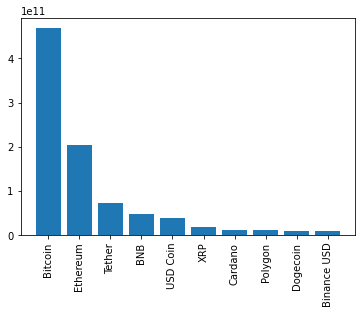

In [ ]:
# Seleccionar solo las primeras 10 filas
df = df.head(10)

# Crear el gráfico
plt.bar(df['Nombre'], df['Capitalización de mercado'])
plt.xticks(rotation=90)
plt.show()

2-La variación porcentual del precio de una criptomoneda en las últimas 24 horas La variación porcentual del precio de una criptomoneda en las últimas 24 horas es el cambio porcentual en el precio de la criptomoneda durante las últimas 24 horas. Este cálculo se realiza comparando el precio actual de la criptomoneda con el precio de hace 24 horas. Por lo tanto, la variación porcentual del precio es una medida de la tasa de crecimiento o caída del precio de la criptomoneda en un período de 24 horas.

In [ ]:
# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la variación porcentual del precio en las últimas 24 horas
data = response.json()
percent_change_24h = data['data']['1']['quote']['USD']['percent_change_24h']

# Imprimir el resultado
print(f"Variación porcentual del precio de Bitcoin en las últimas 24 horas: {percent_change_24h}%")

Variación porcentual del precio de Bitcoin en las últimas 24 horas: 7.81041945%


Como investigacion, podriamos solicitar la variacion del precio del bitcoin en un bucle que se repita una vez por hora para almacenar esa informacion y representarla en un cuadro

In [ ]:
# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Almacenar los datos de variación porcentual en una lista
percent_changes = []

# Realizar una solicitud cada hora durante 24 horas
for i in range(24):
    # Hacer la solicitud
    response = requests.get(url, headers=headers, params=params)
    
    # Extraer la variación porcentual del precio en las últimas 24 horas
    data = response.json()
    percent_change_24h = data['data']['1']['quote']['USD']['percent_change_24h']
    
    # Agregar la variación porcentual a la lista
    percent_changes.append(percent_change_24h)
    
    # Esperar una hora antes de hacer la siguiente solicitud
    time.sleep(3600)

# Crear un gráfico de la evolución de la variación porcentual a lo largo del tiempo
sns.lineplot(x=range(24), y=percent_changes)
plt.xlabel('Hora')
plt.ylabel('Variación porcentual del precio de Bitcoin en las últimas 24 horas')
plt.show()


Este codigo no esta probado porque su ejecucion requiere 24 horas en completarse. Se envia la request para obtener el valor de la criptomoneda cada una hora. 

3-El volumen de operaciones de una criptomoneda en las últimas 24 horas
El volumen de operaciones de una criptomoneda es la cantidad total de la criptomoneda que ha sido comprada y vendida durante un período de tiempo determinado. El volumen de operaciones en las últimas 24 horas es la cantidad total de la criptomoneda que ha sido comprada y vendida durante las últimas 24 horas. El volumen de operaciones es una medida de la actividad comercial de la criptomoneda y puede indicar la liquidez de la criptomoneda.

In [ ]:
#Volumen de operaciones de una criptomoneda en las últimas 24 horas:

# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer el volumen de operaciones en las últimas 24 horas
data = response.json()
volume_24h = data['data']['1']['quote']['USD']['volume_24h']

print(f"Bitcoin volumen 24h: {volume_24h} USD")

Bitcoin volumen 24h: 47351634331.485985 USD


4-La capitalización de mercado de una criptomoneda
La capitalización de mercado de una criptomoneda es el valor total de la criptomoneda en el mercado. Se calcula multiplicando el precio actual de la criptomoneda por la cantidad total de monedas en circulación. La capitalización de mercado es una medida del tamaño de la criptomoneda en el mercado.

In [ ]:
#Capitalización de mercado de una criptomoneda:


# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la capitalización de mercado
data = response.json()
market_cap = data['data']['1']['quote']['USD']['market_cap']

print(f"Bitcoin capitalización de mercado: {market_cap} USD")

Bitcoin capitalización de mercado: 470257569962.25543 USD


5-La lista de las criptomonedas más populares en el momento
La popularidad de una criptomoneda puede medirse por varios factores, como la capitalización de mercado, el volumen de operaciones y la variación porcentual del precio. La lista de las criptomonedas más populares en un momento dado se puede obtener mediante el análisis de estos factores y la comparación de las diferentes criptomonedas. Esta lista puede cambiar con el tiempo a medida que cambian las condiciones del mercado.

In [ ]:
#las criptomonedas mas populares


# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'start': '1',  # Primer resultado
    'limit': '20',  # Obtener 20 resultados
    'convert': 'USD',  # Convertir a USD
    'sort': 'market_cap',  # Ordenar por capitalización de mercado
    'sort_dir': 'desc'  # Orden descendente
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la lista de criptomonedas
data = response.json()
cryptocurrencies = data['data']

# Imprimir la lista de criptomonedas
for currency in cryptocurrencies:
    name = currency['name']
    symbol = currency['symbol']
    market_cap = currency['quote']['USD']['market_cap']
    print(f"{name} ({symbol}): {market_cap} USD")

Bitcoin (BTC): 469929264099.40546 USD
Ethereum (ETH): 205146194167.6364 USD
Tether (USDT): 73205067274.0469 USD
BNB (BNB): 48607968597.630165 USD
USD Coin (USDC): 39476532747.955 USD
XRP (XRP): 18939390613.43763 USD
Cardano (ADA): 11953369967.89878 USD
Polygon (MATIC): 10383126271.4822 USD
Dogecoin (DOGE): 9646034910.307154 USD
Binance USD (BUSD): 8384974034.719476 USD
Solana (SOL): 7801974720.845319 USD
Polkadot (DOT): 7123542043.25935 USD
Dai (DAI): 6466296954.905244 USD
TRON (TRX): 6126886178.424284 USD
Shiba Inu (SHIB): 6081602379.09 USD
Litecoin (LTC): 5879142285.588808 USD
Avalanche (AVAX): 5371628254.5373535 USD
Uniswap (UNI): 4654262371.561423 USD
Wrapped Bitcoin (WBTC): 3710847716.3354177 USD
Chainlink (LINK): 3491149904.213916 USD
